# *Exercises*

1. The director of marketing with many years of experience tells you he believes very strongly that the variant without images (B) won't perform any differently than the original variant. How could you account for this in our model? Implement this change and see how your final conclussion changes.

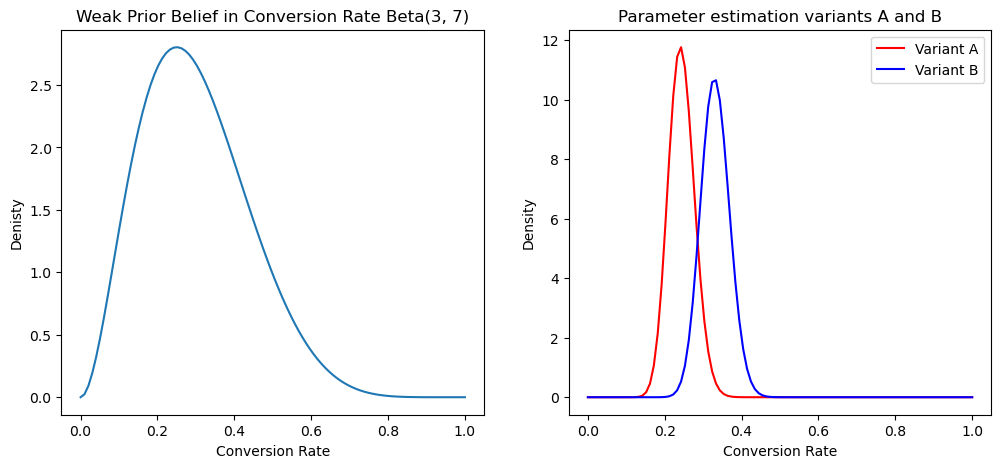

In 96.60% of the 1000 trials, varian B is better than Variant A.


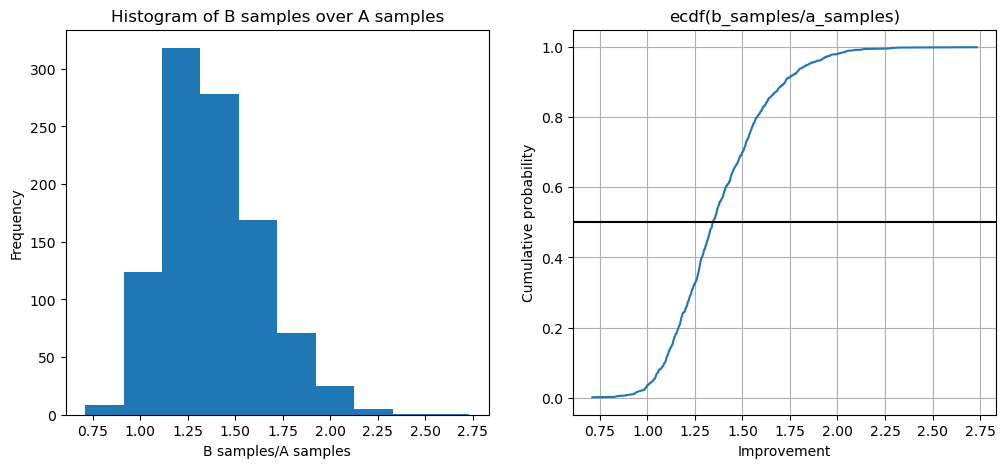

There is 25% chance that Variant B is 50% better than Variant A. 
The chance that B is 20% worse than A is the same that it is 100% better.
To show the belief of the expert we can simply increase the strength of the prior.


In [22]:
import numpy as np
from scipy.stats import beta, ecdf
import matplotlib.pyplot as plt

# Base model
alpha_ = 3
beta_ = 7

x = np.linspace(0, 1, 100)
y = beta.pdf(x, alpha_, beta_)

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))


ax1.plot(x, y)
ax1.set_title('Weak Prior Belief in Conversion Rate Beta(3, 7)')
ax1.set_xlabel('Conversion Rate')
ax1.set_ylabel('Denisty')


# Obersved data to create likelihood and update posterior
variant_a = {'alpha_': 36, 'beta_': 114}
variant_b = {'alpha_': 50, 'beta_': 100}

y_a = beta.pdf(x, alpha_+variant_a['alpha_'], beta_+variant_a['beta_'])
y_b = beta.pdf(x, alpha_+variant_b['alpha_'], beta_+variant_b['beta_'])

ax2.plot(x, y_a, label='Variant A', color='red')
ax2.plot(x, y_b, label='Variant B', color='blue')
ax2.legend()
ax2.set_title('Parameter estimation variants A and B')
ax2.set_xlabel('Conversion Rate')
ax2.set_ylabel('Density')
plt.show()

# Monte Carlo
a_samples = beta.rvs(alpha_+variant_a['alpha_'], beta_+variant_a['beta_'], size=1000)
b_samples = beta.rvs(alpha_+variant_b['alpha_'], beta_+variant_b['beta_'], size=1000)

a_b = sum(b_samples > a_samples)/1000
print(f'In {(a_b)*100:.2f}% of the 1000 trials, varian B is better than Variant A.')


fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))
ax1.hist(b_samples/a_samples, label='Histogram of B samples over A samples')
ax1.set_xlabel('B samples/A samples')
ax1.set_ylabel('Frequency')
ax1.set_title('Histogram of B samples over A samples')
ecdf_result = ecdf(b_samples/a_samples)
x = ecdf_result.cdf.quantiles
y = ecdf_result.cdf.probabilities
ax2.plot(x, y)
ax2.set_title('ecdf(b_samples/a_samples)')
ax2.set_xlabel('Improvement')
ax2.set_ylabel('Cumulative probability')
ax2.grid()
ax2.axhline(0.5, color='black')
plt.show()
print(f'There is 25% chance that Variant B is 50% better than Variant A. \nThe chance that B is 20% worse than A is the same that it is 100% better.')
print(f'To show the belief of the expert we can simply increase the strength of the prior.')

2. The lead designer sees your results and insists that there's no ay that variant B should perform better with no images. She feels that you should assume the conversion rate for variant B is closer to 20% than 30%. Implement this.

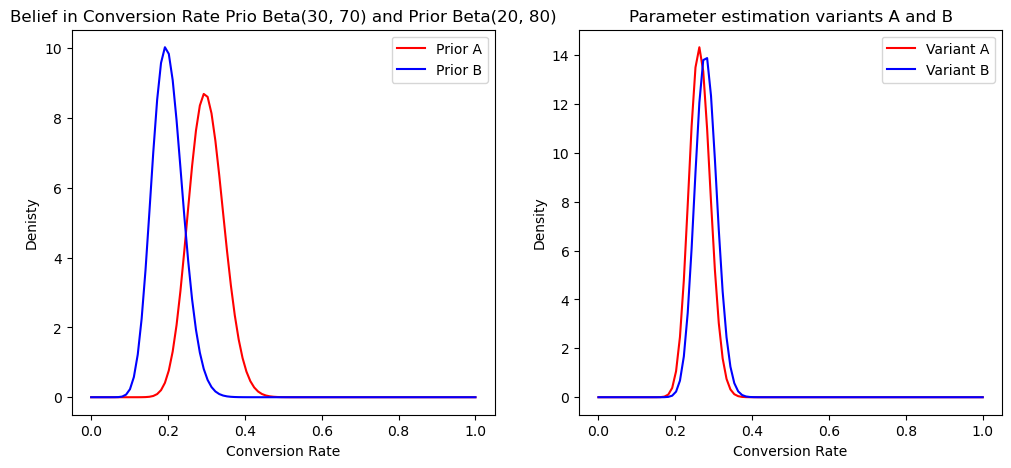

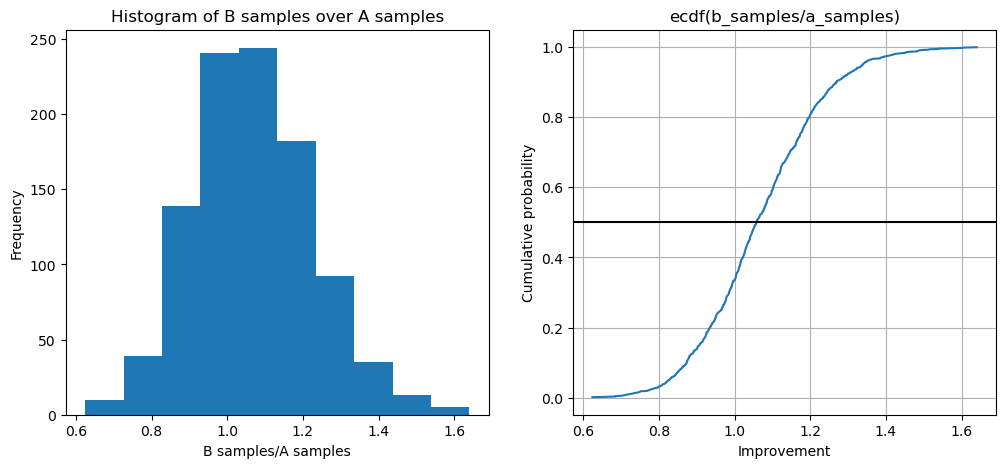

In 66.50% of the 1000 trials, varian B is better than Variant A.


In [29]:
import numpy as np
from scipy.stats import beta, ecdf
import matplotlib.pyplot as plt

# Base model
alpha_ = 30
beta_ = 70

# Base model prior B
alpha_b = 20
beta_b = 80

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

x = np.linspace(0, 1, 100)
y = beta.pdf(x, alpha_, beta_)
ax1.plot(x, y, color='red', label='Prior A')
x = np.linspace(0, 1, 100)
y = beta.pdf(x, alpha_b, beta_b)
ax1.plot(x, y, color='blue', label='Prior B')
ax1.set_title('Belief in Conversion Rate Prio Beta(30, 70) and Prior Beta(20, 80)')
ax1.set_xlabel('Conversion Rate')
ax1.set_ylabel('Denisty')
ax1.legend()


# Obersved data to create likelihood and update posterior
variant_a = {'alpha_': 36, 'beta_': 114}
variant_b = {'alpha_': 50, 'beta_': 100}

y_a = beta.pdf(x, alpha_+variant_a['alpha_'], beta_+variant_a['beta_'])
y_b = beta.pdf(x, alpha_b+variant_b['alpha_'], beta_b+variant_b['beta_'])

ax2.plot(x, y_a, label='Variant A', color='red')
ax2.plot(x, y_b, label='Variant B', color='blue')
ax2.legend()
ax2.set_title('Parameter estimation variants A and B')
ax2.set_xlabel('Conversion Rate')
ax2.set_ylabel('Density')
plt.show()

# Monte Carlo
a_samples = beta.rvs(alpha_+variant_a['alpha_'], beta_+variant_a['beta_'], size=1000)
b_samples = beta.rvs(alpha_b+variant_b['alpha_'], beta_b+variant_b['beta_'], size=1000)

a_b = sum(b_samples > a_samples)/1000

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))
ax1.hist(b_samples/a_samples, label='Histogram of B samples over A samples')
ax1.set_xlabel('B samples/A samples')
ax1.set_ylabel('Frequency')
ax1.set_title('Histogram of B samples over A samples')
ecdf_result = ecdf(b_samples/a_samples)
x = ecdf_result.cdf.quantiles
y = ecdf_result.cdf.probabilities
ax2.plot(x, y)
ax2.set_title('ecdf(b_samples/a_samples)')
ax2.set_xlabel('Improvement')
ax2.set_ylabel('Cumulative probability')
ax2.grid()
ax2.axhline(0.5, color='black')
plt.show()
print(f'In {(a_b)*100:.2f}% of the 1000 trials, varian B is better than Variant A.')

3. Assume that being 95% certain means that you're more or less 'convinced' of a hypothesis. Also assume that there's no longer any limit to the number of emails you can send in your test. If the true conversion for A is 0.25 and for B is 0.3, explore how many samples it would take to convince the director of marketing that B was in fact superior. 

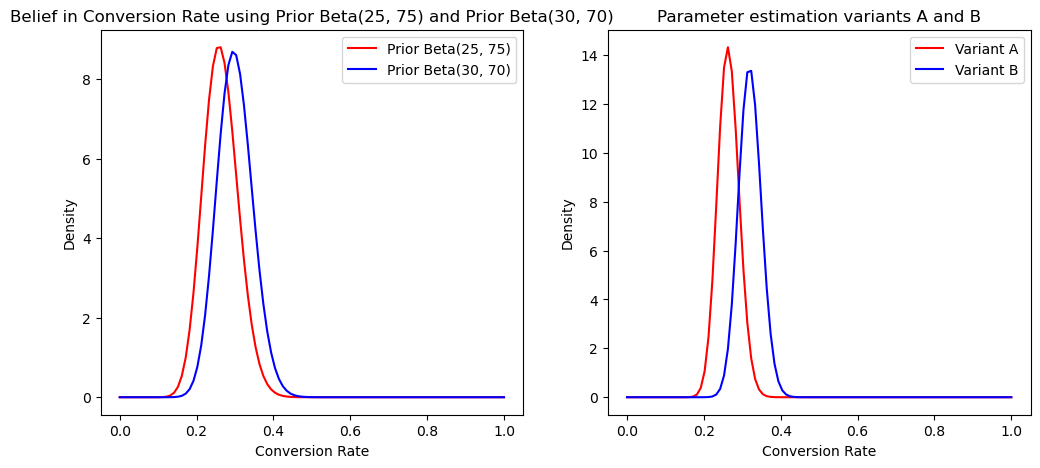

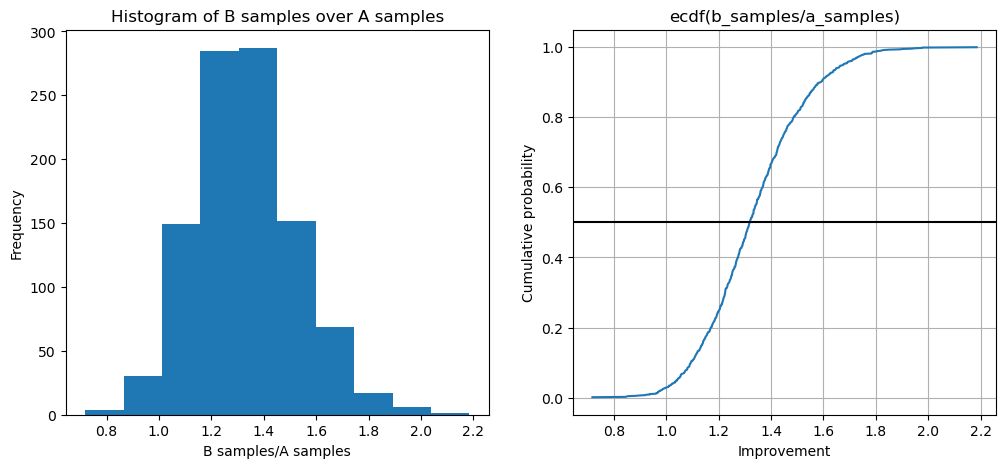

In 97.30% of the 1000 trials, Variant B is better than Variant A.
It took 1000 samples


In [48]:
from scipy.stats import beta, ecdf
import numpy as np
import matplotlib.pyplot as plt

# Base model Prior A
alpha_a = 25
beta_a = 75

# Base model Prior B
alpha_b = 30
beta_b = 70

x = np.linspace(0, 1, 100)
y_a = beta.pdf(x, alpha_a, beta_b)
y_b = beta.pdf(x, alpha_b, beta_b)

# Observed data
variant_a = {'alpha_': 36, 'beta_': 114}
variant_b = {'alpha_': 50, 'beta_': 100}


fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))
ax1.plot(x, y_a, color='red', label='Prior Beta(25, 75)')
ax1.plot(x, y_b, color='blue', label='Prior Beta(30, 70)')
ax1.set_title('Belief in Conversion Rate using Prior Beta(25, 75) and Prior Beta(30, 70)')
ax1.set_xlabel('Conversion Rate')
ax1.set_ylabel('Density')
ax1.legend()
# Create likelihood with observed data and update Beta to Posterior
y_a = beta.pdf(x, alpha_+variant_a['alpha_'], beta_+variant_a['beta_'])
y_b = beta.pdf(x, alpha_b+variant_b['alpha_'], beta_b+variant_b['beta_'])
ax2.plot(x, y_a, label='Variant A', color='red')
ax2.plot(x, y_b, label='Variant B', color='blue')
ax2.legend()
ax2.set_title('Parameter estimation variants A and B')
ax2.set_xlabel('Conversion Rate')
ax2.set_ylabel('Density')
plt.show()

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))
ax1.hist(b_samples/a_samples, label='Histogram of B samples over A samples')
ax1.set_xlabel('B samples/A samples')
ax1.set_ylabel('Frequency')
ax1.set_title('Histogram of B samples over A samples')
ecdf_result = ecdf(b_samples/a_samples)
x = ecdf_result.cdf.quantiles
y = ecdf_result.cdf.probabilities
ax2.plot(x, y)
ax2.set_title('ecdf(b_samples/a_samples)')
ax2.set_xlabel('Improvement')
ax2.set_ylabel('Cumulative probability')
ax2.grid()
ax2.axhline(0.5, color='black')
plt.show()

a_samples = beta.rvs(alpha_a+variant_a['alpha_'], beta_a+variant_a['beta_'], size=i)
b_samples = beta.rvs(alpha_b+variant_b['alpha_'], beta_b+variant_b['beta_'], size=i)
a_b = sum(b_samples > a_samples)/i
print(f'In {(a_b)*100:.2f}% of the 1000 trials, Variant B is better than Variant A.')

# Monte Carlo
i = 1000
while True:
    a_samples = beta.rvs(alpha_a+variant_a['alpha_'], beta_a+variant_a['beta_'], size=i)
    b_samples = beta.rvs(alpha_b+variant_b['alpha_'], beta_b+variant_b['beta_'], size=i)
    a_b = sum(b_samples > a_samples)/i
    if a_b >= 0.95:
        print(f'It took {i} samples')
        break
    i += 100
